## Import Packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from IPython.display import display

## Risk Analysis of Colorado

In [21]:
#Load in CSV Files
co_svi = pd.read_csv("Colorado.csv")
co_nri = pd.read_csv("NRI_Table_CensusTracts_Colorado.csv")

#Creating a column
co_nri["STCNTY"] = co_nri['STCOFIPS']
co_nri.columns

#Merge Data
complete_data_co = pd.merge(co_nri, co_svi, on = 'STCNTY')
#Merge without Repeat Names
complete_data_co = pd.merge(co_nri, co_nri, on = "STCNTY", suffixes=('','_right'))

In [22]:
#My Risk: Landslide
### Create a column called "my_risk" which multiplies your frequency by your impact
complete_data_co['my_risk'] = complete_data_co['LNDS_AFREQ']*complete_data_co['LNDS_EXPB']

In [23]:
#Three Risks
complete_data_co['river_flooding_building_risk'] = complete_data_co['RFLD_AFREQ']*complete_data_co['RFLD_EXPB']
complete_data_co['ww_ag_risk'] = complete_data_co['WNTW_AFREQ']*complete_data_co['WNTW_EALA']
complete_data_co['ww_building_risk'] = complete_data_co['WNTW_AFREQ']*complete_data_co['WNTW_EALB']

In [24]:
### Group your data by county
grouped_data = complete_data_co.groupby('COUNTY',as_index=False)

## Run summary mean by county
grouped_data = complete_data_co.groupby('COUNTY').agg(mean_landslides=('my_risk', 'mean'), 
                                                   mean_river_flood=('river_flooding_building_risk', 'mean'))

print(grouped_data)

            mean_landslides  mean_river_flood
COUNTY                                       
Adams          5.205836e+05      5.806294e+06
Alamosa        1.017273e+05      2.062261e+06
Arapahoe       2.724312e+05      5.820291e+06
Archuleta      1.109581e+07      6.648674e+06
Baca           4.232235e+04      0.000000e+00
...                     ...               ...
Summit         2.218833e+07      7.758097e+05
Teller         1.920162e+06      7.092244e+06
Washington     9.215750e+03      3.117066e+06
Weld           9.795419e+04      3.249076e+07
Yuma           2.087462e+06      2.857638e+07

[64 rows x 2 columns]


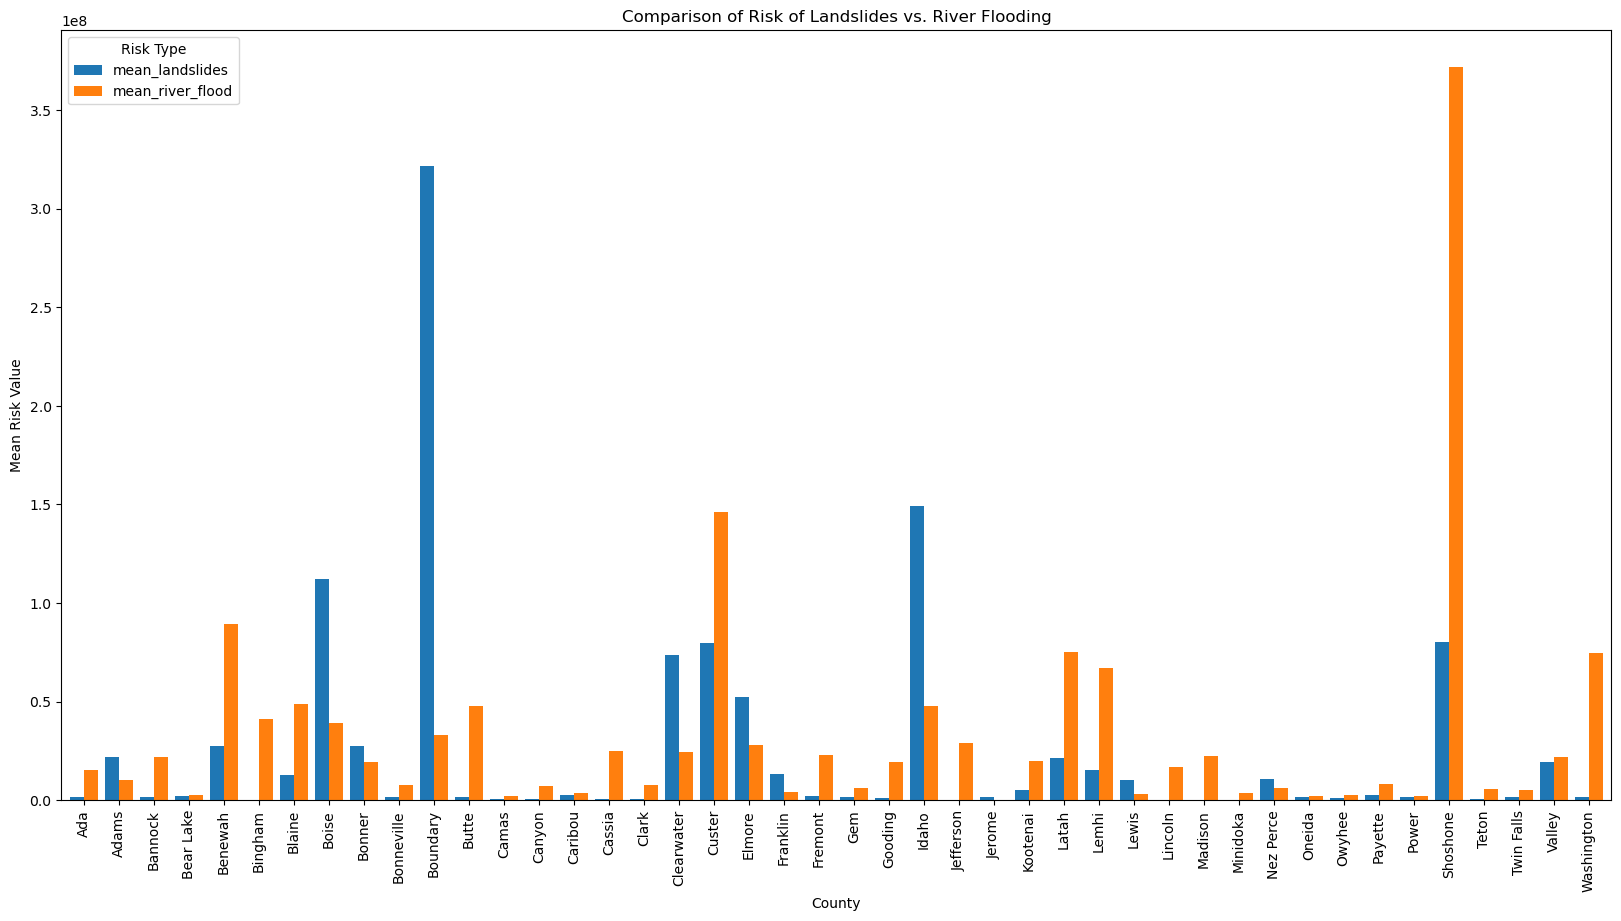

In [28]:
#Colorado Graph
# Create bar plot with side-by-side bars (dodged effect)
grouped_data.plot(kind='bar', figsize=(20, 10), width=0.8)

# Customizing the plot
plt.xlabel('County')
plt.ylabel('Mean Risk Value')
plt.title('Comparison of Risk of Landslides vs. River Flooding')
plt.xticks(rotation=90)

# Show the plot
plt.legend(title="Risk Type")  # Adding a legend to distinguish risk types
plt.show()

            mean_landslides  mean_river_flood
COUNTY                                       
Ada            1.457193e+06      1.508885e+07
Adams          2.182312e+07      1.004963e+07
Bannock        1.531726e+06      2.185392e+07
Bear Lake      1.931765e+06      2.426739e+06
Benewah        2.735976e+07      8.927446e+07
Bingham        6.326687e+04      4.137653e+07
Blaine         1.273114e+07      4.893818e+07
Boise          1.122785e+08      3.905465e+07
Bonner         2.751885e+07      1.951990e+07
Bonneville     1.587742e+06      7.724250e+06
Boundary       3.214504e+08      3.289811e+07
Butte          1.362555e+06      4.761872e+07
Camas          7.839501e+05      2.095451e+06
Canyon         3.931113e+05      7.304867e+06
Caribou        2.433817e+06      3.582283e+06
Cassia         4.543156e+05      2.465190e+07
Clark          3.995340e+05      7.480912e+06
Clearwater     7.361632e+07      2.448996e+07
Custer         7.981689e+07      1.462134e+08
Elmore         5.231024e+07      2

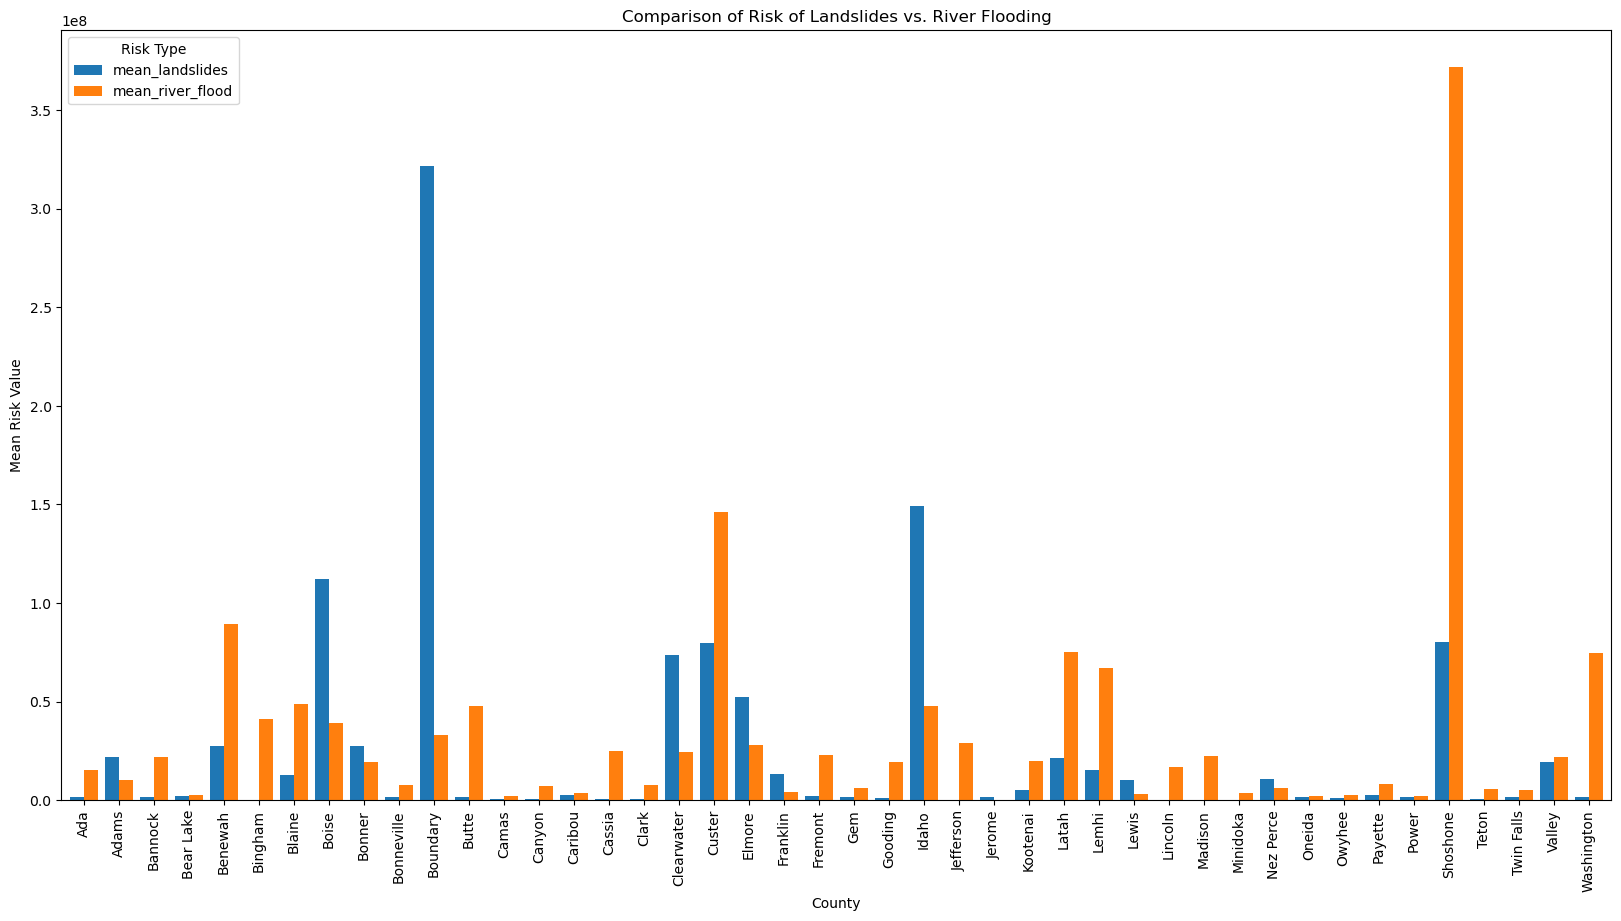

In [30]:
#Load in CSV Files
id_svi = pd.read_csv("Idaho_SVI.csv")
id_nri = pd.read_csv("NRI_Table_CensusTracts_Idaho.csv")

#Creating a column
id_nri["STCNTY"] = id_nri['STCOFIPS']
id_nri.columns

#Merge Data
complete_data_id = pd.merge(id_nri, id_svi, on = 'STCNTY')
#Merge without Repeat Names
complete_data_id = pd.merge(id_nri, id_nri, on = "STCNTY", suffixes=('','_right'))

#My Risk: Landslide
### Create a column called "my_risk" which multiplies your frequency by your impact
complete_data_id['my_risk'] = complete_data_id['LNDS_AFREQ']*complete_data_id['LNDS_EXPB']

#Three Risks
complete_data_id['river_flooding_building_risk'] = complete_data_id['RFLD_AFREQ']*complete_data_id['RFLD_EXPB']
complete_data_id['ww_ag_risk'] = complete_data_id['WNTW_AFREQ']*complete_data_id['WNTW_EALA']
complete_data_id['ww_building_risk'] = complete_data_id['WNTW_AFREQ']*complete_data_id['WNTW_EALB']

### Group your data by county
grouped_data = complete_data_id.groupby('COUNTY',as_index=False)

## Run summary mean by county
grouped_data = complete_data_id.groupby('COUNTY').agg(mean_landslides=('my_risk', 'mean'), 
                                                   mean_river_flood=('river_flooding_building_risk', 'mean'))

print(grouped_data)

#Colorado Graph
# Create bar plot with side-by-side bars (dodged effect)
grouped_data.plot(kind='bar', figsize=(20, 10), width=0.8)

# Customizing the plot
plt.xlabel('County')
plt.ylabel('Mean Risk Value')
plt.title('Comparison of Risk of Landslides vs. River Flooding')
plt.xticks(rotation=90)

# Show the plot
plt.legend(title="Risk Type")  # Adding a legend to distinguish risk types
plt.show()

